In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [119]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B66D-EEDA

 Directory of C:\Users\DELL\Documents\Pune @ Exelr\Multiple Linear Regration

12-08-2021  08:23    <DIR>          .
12-08-2021  08:23    <DIR>          ..
11-08-2021  12:36    <DIR>          .ipynb_checkpoints
09-08-2021  12:54             3,527 Cars (2).csv
12-08-2021  08:23         1,534,864 Multiple Linear Regression (practice).ipynb
10-08-2021  22:33           612,816 multiple-linear-regression-new.ipynb
10-08-2021  11:49           121,044 Toyoto_Corrola - Toyoto_Corrola.csv
               4 File(s)      2,272,251 bytes
               3 Dir(s)  218,807,431,168 bytes free


In [120]:
toyoto=pd.read_csv("Toyoto_Corrola - Toyoto_Corrola.csv")

In [121]:
toyoto.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [64]:
data=data.rename({'Age_08_04':'Age'},axis=1)

In [65]:
data.head()

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [66]:
data.info

<bound method DataFrame.info of         Id                                              Model  Price  Age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

         KM   HP  Doors  Cylinders  Gears  

In [67]:
#check for missing values
data.isna().sum()

Id           0
Model        0
Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## corelation matrix

In [68]:
data.corr()

,Id,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


 # Scatterplot between variables along with histograms

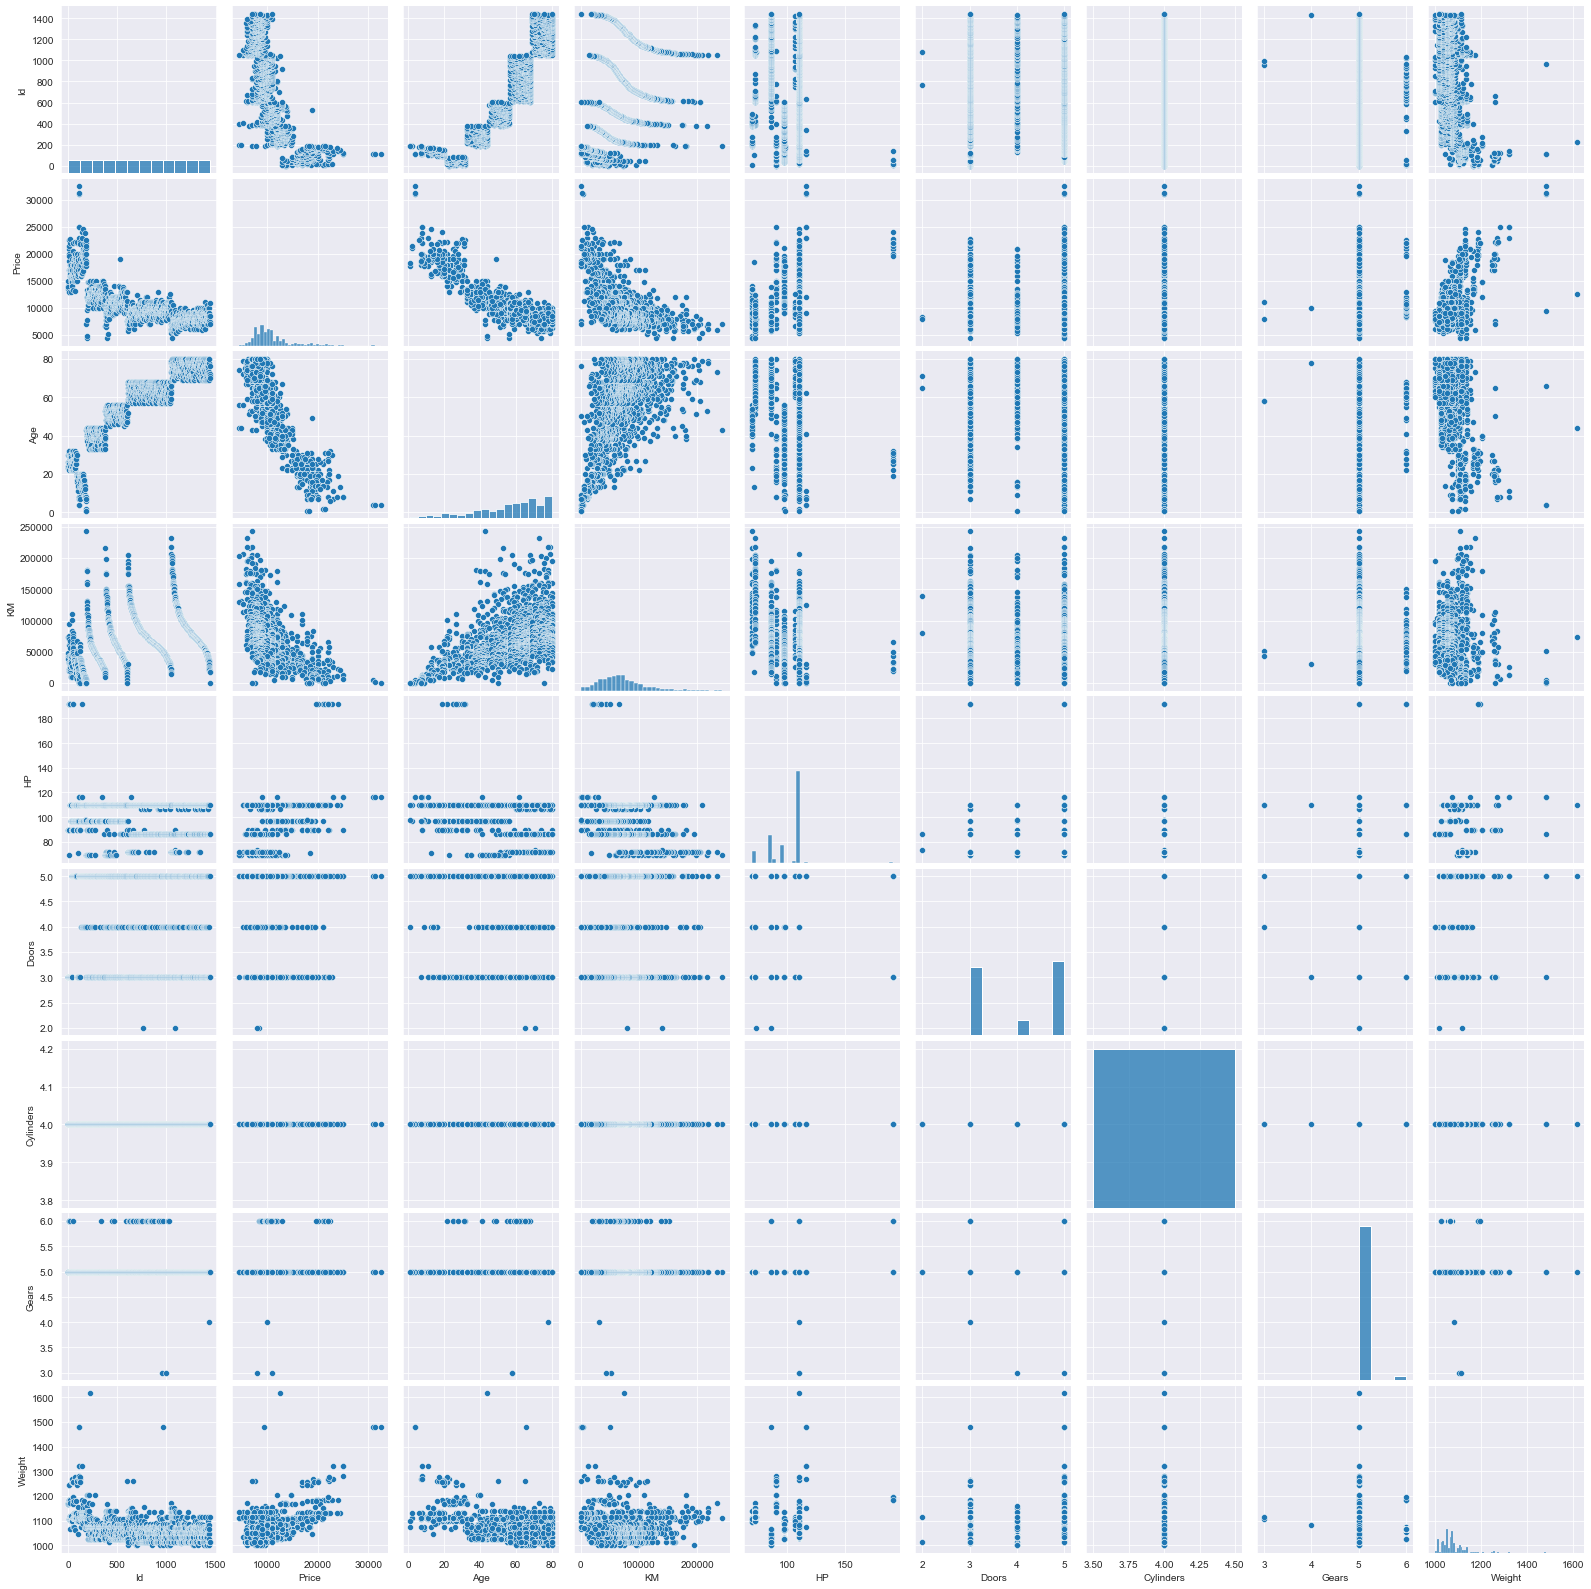

In [69]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# preparing a model

In [70]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+Doors+Cylinders+Gears+Weight',data=data).fit()

In [71]:
#Coefficients
model.params

Intercept    -410.845504
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [72]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [73]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

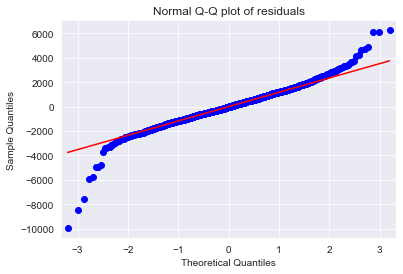

In [74]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [75]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

### Residual Plot for Homoscedasticity

In [76]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

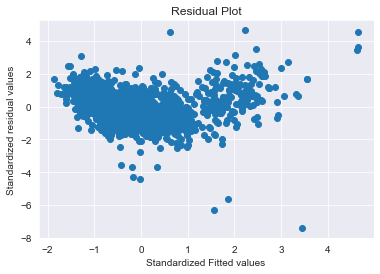

In [77]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

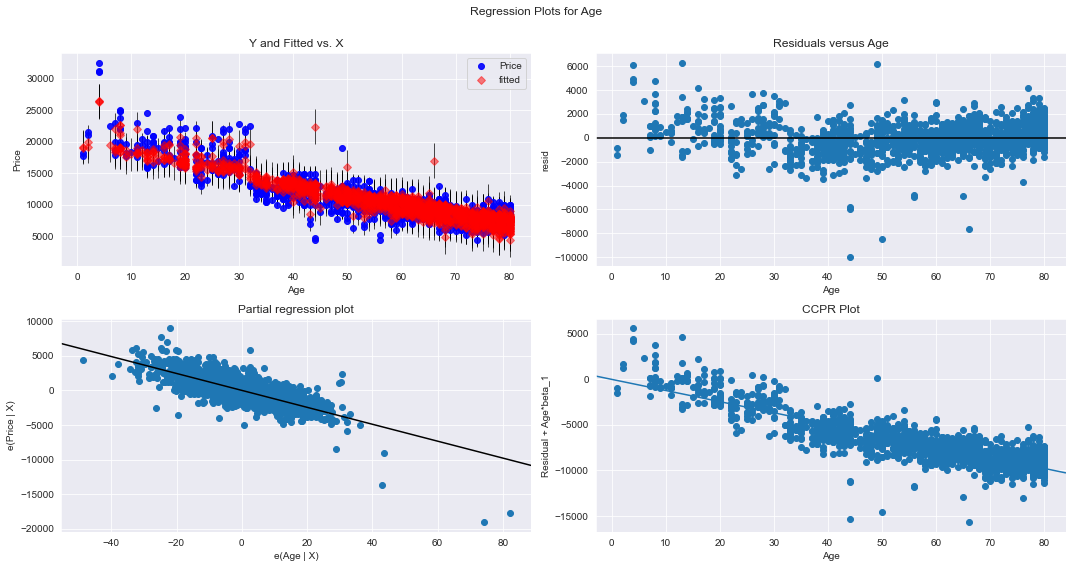

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

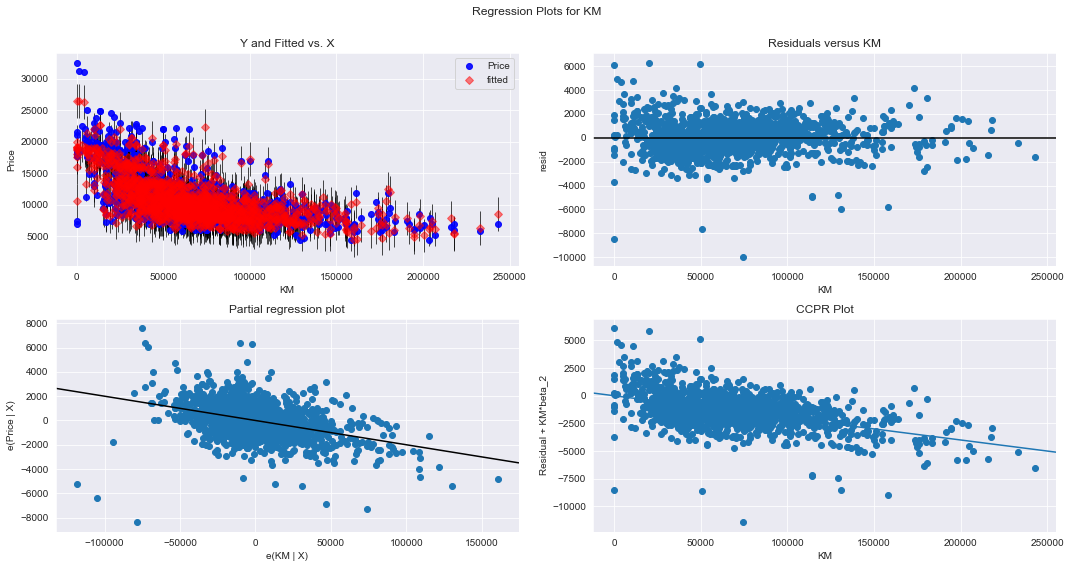

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

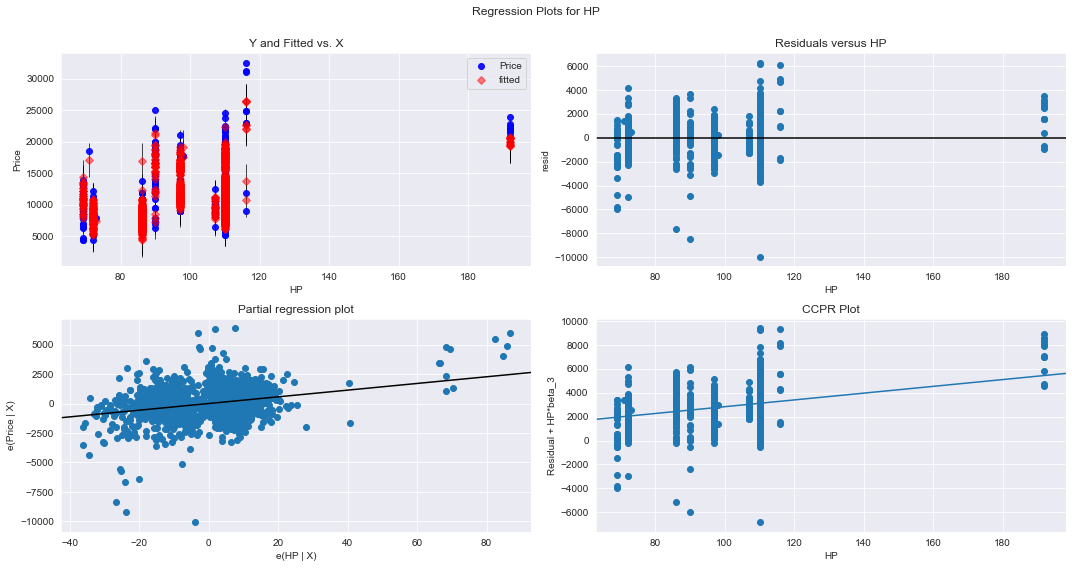

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

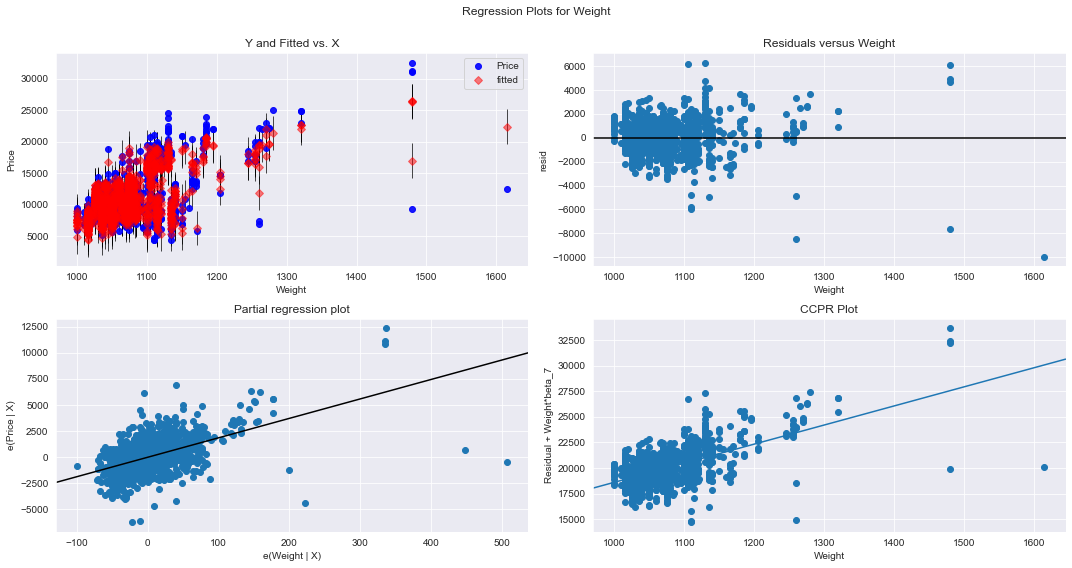

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

##  Detecting Influencers/Outliers

## Cook’s Distance

In [82]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

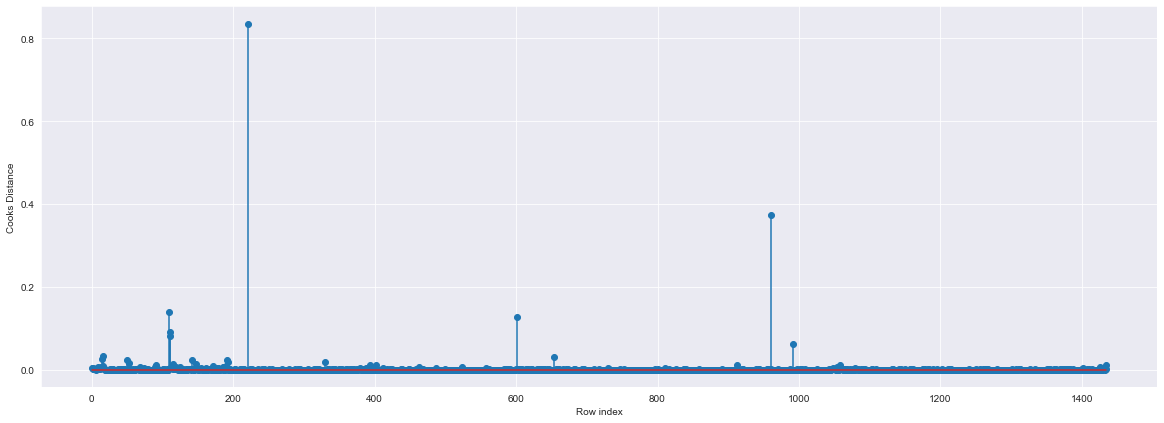

In [83]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508853962)

# High Influence points

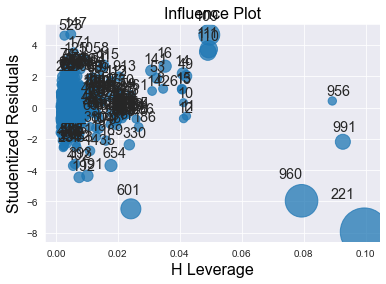

In [26]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [85]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

### From the above plot, it is evident that data point 221 are the influencers

In [86]:
data[data.index.isin([221,960])]

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480


In [87]:
#See the differences in HP and other variable values
data.head()

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


# Improving the model

In [88]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B66D-EEDA

 Directory of C:\Users\DELL\Documents\Pune @ Exelr\Multiple Linear Regration

12-08-2021  08:17    <DIR>          .
12-08-2021  08:17    <DIR>          ..
11-08-2021  12:36    <DIR>          .ipynb_checkpoints
09-08-2021  12:54             3,527 Cars (2).csv
12-08-2021  08:17           814,358 Multiple Linear Regression (practice).ipynb
10-08-2021  22:33           612,816 multiple-linear-regression-new.ipynb
10-08-2021  11:49           121,044 Toyoto_Corrola - Toyoto_Corrola.csv
               4 File(s)      1,551,745 bytes
               3 Dir(s)  218,809,327,616 bytes free


In [114]:
#load the data
data_new=pd.read_csv("Toyoto_Corrola - Toyoto_Corrola.csv")

In [115]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data.drop(data.index[[221,960]],axis=0).reset_index()

In [116]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [117]:
data1

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


# Build Model

In [113]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_A= smf.ols('Price~Age_08_04+KM+HP+Weight',data = data1).fit()

PatsyError: Error evaluating factor: NameError: name 'Age_08_04' is not defined
    Price~Age_08_04+KM+HP+Weight
          ^^^^^^^^^

In [94]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.8716037757973425, 24643.238788745424)

##### Comparing above R-Square and AIC values, model 'final_ml_A' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

## Cook’s Distance

In [95]:
model_influence_A = final_ml_A.get_influence()
(c_A, _) = model_influence_A.cooks_distance

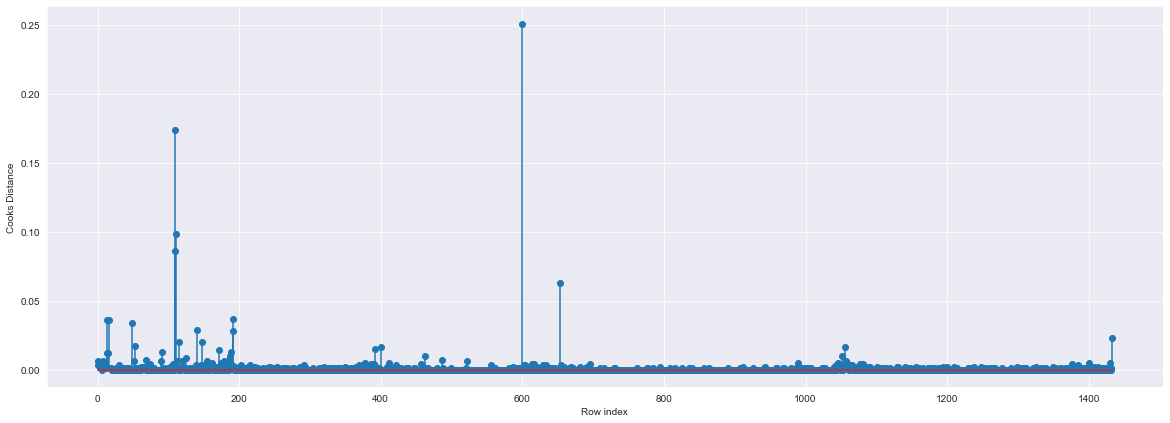

In [96]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_A,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [97]:
#index of the data points where c is more than .5
(np.argmax(c_A),np.max(c_A))

(600, 0.2512754955332862)

In [98]:
#Drop 221 observation
data2=data1.drop(data1.index[[959]],axis=0)

In [99]:
data2

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [100]:
#Reset the index and re arrange the row values
data3=data2.reset_index()

In [101]:
data4=data3.drop(['index'],axis=1)

In [102]:
data4

,Id,Model,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1429,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1430,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1431,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [112]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Weight',data = data4).fit()

PatsyError: Error evaluating factor: NameError: name 'Age_08_04' is not defined
    Price~Age_08_04+KM+HP+Weight
          ^^^^^^^^^

In [104]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

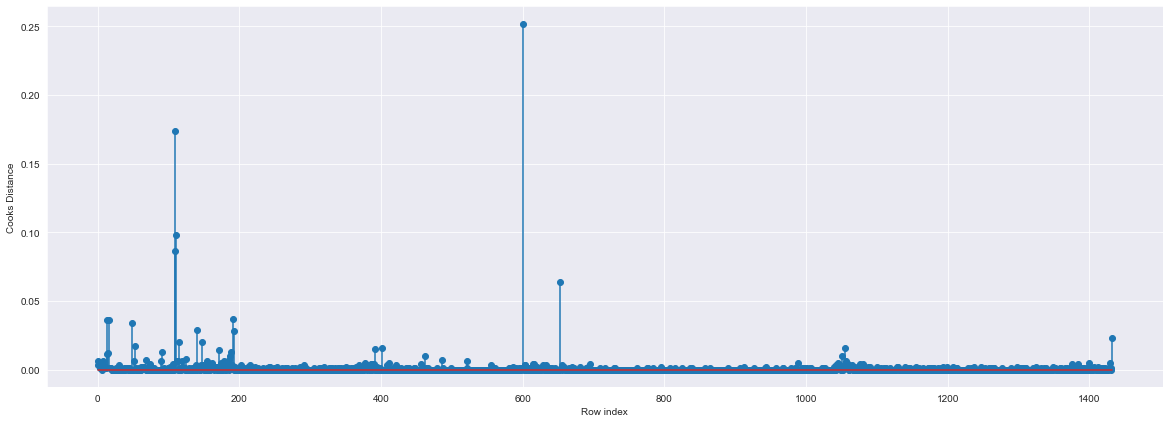

In [105]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [106]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(600, 0.25187521099999294)

In [111]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Weight',data = data4).fit()

PatsyError: Error evaluating factor: NameError: name 'Age_08_04' is not defined
    Price~Age_08_04+KM+HP+Weight
          ^^^^^^^^^

In [108]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.8716037757973425, 24643.238788745424)

#   Predicting for new data

In [109]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':23,'KM':46986,'HP':90,'Doors':3,'Cylinders':4,'Gears':5,'Weight':1165},index=[1])

In [110]:
final_ml_A.predict(new_data)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Age' is not defined
    Price~Age+KM+HP+Weight
          ^^^

In [56]:
final_ml_A.predict(data_new.iloc[0:5,])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Age' is not defined
    Price~Age+KM+HP+Weight
          ^^^

In [110]:
pred_y = final_ml_A.predict(data_new)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Age' is not defined
    Price~Age+KM+HP+Weight
          ^^^

In [105]:
pred_y

0       16749.232919
1       16197.046132
2       16745.181249
3       16378.776752
4       16226.236434
            ...     
1431     8753.434066
1432     8216.423578
1433     8374.932644
1434     8493.353856
1435    11034.246883
Length: 1436, dtype: float64